# Estudo de Qualidade do vinho 

#### Resumo

- Classificar mercadorias pode dar ao produtor uma informação valiosa na hora de definir estratégias de marketing e de preços, nesse sentido, esse trabalho visa classificar os vinhos tintos em vinhos de qualidade "boa" e "ruins" (ou superior e inferior, como preferir). Palavras-chaves: Química, aprendizado de máquina, vinho, mercado

#### Metodologia
Machine Learning (PYTHON)
- Usando técnicas de aprendizado de máquinas, conseguimos classificar e definir as variáveis (os componentes químicos) mais relevantes para essa classificação. Depois de classificados, escolheremos os melhores modelos através da avaliação pela acurácia, e então com o modelo selecionado, exploraremos outras técnicas de validação.

#### Conclusão

- Utilizar modelos de aprendizado de máquina para fazer essas classificações pode ser mais relevante do que por "intuição" de um funcionário experiente. Isso porque os modelos são baseados em algoritmos matemáticos e estatísticos muito precisos. O próximo passo é saber fazer uma análise de negócios para tomar decisões estratégicas na produção e venda desses vinhos. E para isso são necessárias habilidades que uma máquina não possui

### Estudo do Red Wine/ Vinho tinto

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
data_red = pd.read_csv('winequality-red.csv')

In [8]:
# Aqui pode-se perceber que o dataframe possuí apenas uma coluna, em que os valores estão bagunçados, é necessário tratar 
# Delimitando as colunas e os valores a partir do separados que vai ser o (;)

data_red.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [9]:
# Criando um novo dataframe para receber os dados estruturados

data_red_new = pd.DataFrame()

In [10]:
# Delimitando as colunas e os valores a partir do separador de texto que é o ;
# E atribuindo esses novos valores a um novo dataframe

data_red_new[['Acidez Fixa', 'Acidez Volátil', 'Acido Citrico', 'Acuçar Residual', 'Cloretos', 'Dioxido de Enxofre Livre', 'Dióxido de Enxofre Total', 'Densidade', 'pH', 'Sulfatos', 'Alcool', 'Qualidade']] = data_red['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(";", expand=True)

In [11]:
data_red_new.head(11)

,Acidez Fixa,Acidez Volátil,Acido Citrico,Acuçar Residual,Cloretos,Dioxido de Enxofre Livre,Dióxido de Enxofre Total,Densidade,pH,Sulfatos,Alcool,Qualidade
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
6,7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5
7,7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7
8,7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7
9,7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5


### Como será realizada a técnica de machine Learning?

A partir dos componentes existentes em cada vinho pode-se determinar se o vinho é bom ou ruim. 

In [12]:
# 1599 itens
# 12 colunas

data_red_new.shape

(1599, 12)

- É sempre bom observar os tipos de dados para evitar retrabalho

In [13]:
# Informações do dataframe
# Aqui percebe-se que os valores estão como object
# É necessário transformar para float e int

data_red_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Acidez Fixa               1599 non-null   object
 1   Acidez Volátil            1599 non-null   object
 2   Acido Citrico             1599 non-null   object
 3   Acuçar Residual           1599 non-null   object
 4   Cloretos                  1599 non-null   object
 5   Dioxido de Enxofre Livre  1599 non-null   object
 6   Dióxido de Enxofre Total  1599 non-null   object
 7   Densidade                 1599 non-null   object
 8   pH                        1599 non-null   object
 9   Sulfatos                  1599 non-null   object
 10  Alcool                    1599 non-null   object
 11  Qualidade                 1599 non-null   object
dtypes: object(12)
memory usage: 150.0+ KB


In [14]:
# Transformando as variáveis object para float

data_red_new['Acidez Fixa'] = data_red_new['Acidez Fixa'].astype(float)
data_red_new['Acidez Volátil'] = data_red_new['Acidez Volátil'].astype(float)
data_red_new['Acido Citrico'] = data_red_new['Acido Citrico'].astype(float)
data_red_new['Acuçar Residual'] = data_red_new['Acuçar Residual'].astype(float)
data_red_new['Cloretos'] = data_red_new['Cloretos'].astype(float)
data_red_new['Densidade'] = data_red_new['Densidade'].astype(float)
data_red_new['pH'] = data_red_new['pH'].astype(float)
data_red_new['Sulfatos'] = data_red_new['Sulfatos'].astype(float)
data_red_new['Alcool'] = data_red_new['Alcool'].astype(float)
data_red_new['Dioxido de Enxofre Livre'] = data_red_new['Dioxido de Enxofre Livre'].astype(float)
data_red_new['Dióxido de Enxofre Total'] = data_red_new['Dióxido de Enxofre Total'].astype(float)

In [15]:
# Transformando as variáveis object para int

data_red_new['Qualidade'] = data_red_new['Qualidade'].astype(int)

In [16]:
data_red_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Acidez Fixa               1599 non-null   float64
 1   Acidez Volátil            1599 non-null   float64
 2   Acido Citrico             1599 non-null   float64
 3   Acuçar Residual           1599 non-null   float64
 4   Cloretos                  1599 non-null   float64
 5   Dioxido de Enxofre Livre  1599 non-null   float64
 6   Dióxido de Enxofre Total  1599 non-null   float64
 7   Densidade                 1599 non-null   float64
 8   pH                        1599 non-null   float64
 9   Sulfatos                  1599 non-null   float64
 10  Alcool                    1599 non-null   float64
 11  Qualidade                 1599 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 143.8 KB


In [17]:
data_red_new.describe() # Não estava mostrando a sua descrição total, pois os dados estavam como 'object' e não dados numéricos
                        # para isso foi primeiro transforma-lós para numéricos

,Acidez Fixa,Acidez Volátil,Acido Citrico,Acuçar Residual,Cloretos,Dioxido de Enxofre Livre,Dióxido de Enxofre Total,Densidade,pH,Sulfatos,Alcool,Qualidade
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [18]:
data_red_new.describe()

,Acidez Fixa,Acidez Volátil,Acido Citrico,Acuçar Residual,Cloretos,Dioxido de Enxofre Livre,Dióxido de Enxofre Total,Densidade,pH,Sulfatos,Alcool,Qualidade
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
data_red_new.isnull().sum()

Acidez Fixa                 0
Acidez Volátil              0
Acido Citrico               0
Acuçar Residual             0
Cloretos                    0
Dioxido de Enxofre Livre    0
Dióxido de Enxofre Total    0
Densidade                   0
pH                          0
Sulfatos                    0
Alcool                      0
Qualidade                   0
dtype: int64

### Distribuição da qualidade 

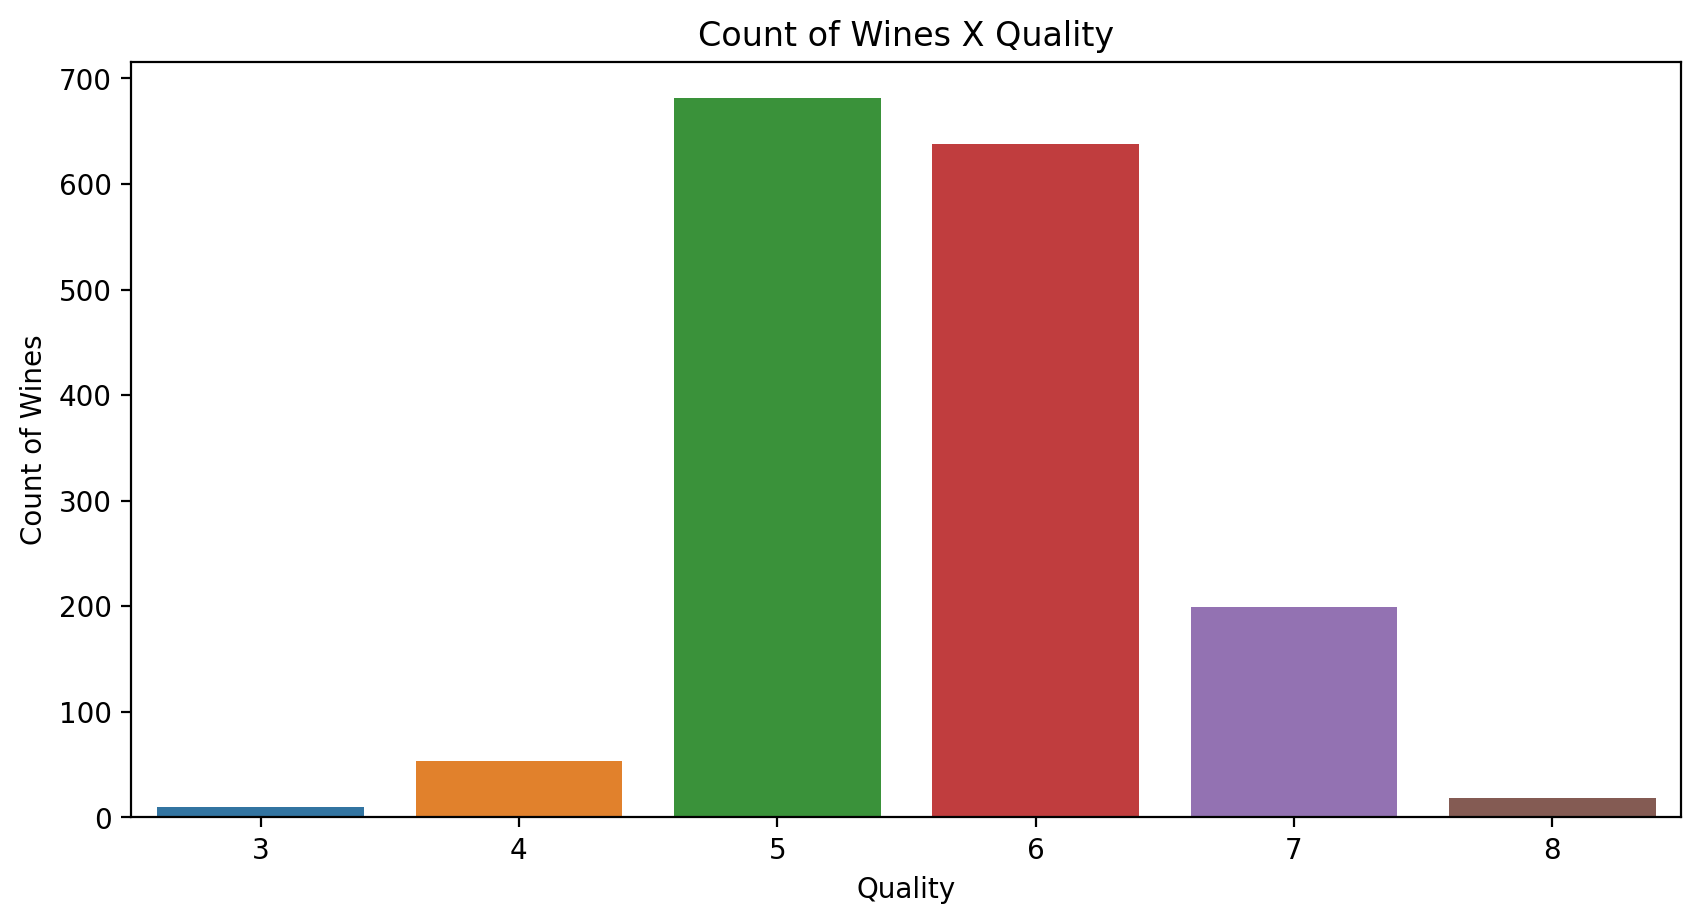

In [20]:
# Um vinho com qualidade 8 não necessariamente é melhor que um vinho com qualidade 4, além disso um vinho com qualidade 3 não é
# necessariamente ruim comparado a um vinho com qualidade 7 e assim por diante. 

plt.figure(figsize=(10,5), dpi=200)

sns.countplot('Qualidade', data = data_red_new)
plt.xlabel('Quality')
plt.ylabel('Count of Wines')
plt.title('Count of Wines X Quality')

plt.show()

### Função de Densidade de probabilidade para a variável Acidez Fixa

In [21]:
data_red_new.head()

,Acidez Fixa,Acidez Volátil,Acido Citrico,Acuçar Residual,Cloretos,Dioxido de Enxofre Livre,Dióxido de Enxofre Total,Densidade,pH,Sulfatos,Alcool,Qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Text(0.5, 1.0, 'Distribuição de Acidez Fixa')

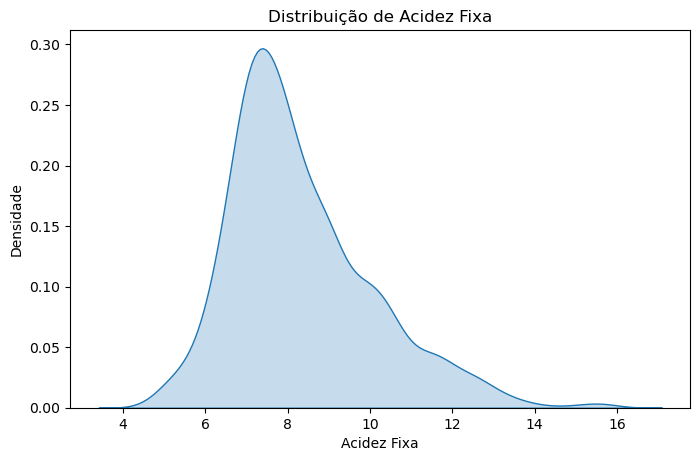

In [22]:
# um pouco sobre a função kdeplot do seaborn 
# O Kdeplot é um Gráfico de Estimativa de Distribuição do Kernel que descreve a função de densidade de probabilidade das variáveis de dados contínuas ou não paramétricas
# ou seja, podemos plotar para variáveis univariadas ou múltiplas. Usando o módulo Python Seaborn, podemos construir o Kdeplot com várias funcionalidades adicionadas a ele.

plt.figure(figsize=(8,5), dpi=100)

sns.kdeplot(data_red_new['Acidez Fixa'], shade=True)

plt.xlabel('Acidez Fixa')
plt.ylabel('Densidade')
plt.title('Distribuição de Acidez Fixa', fontsize=12)

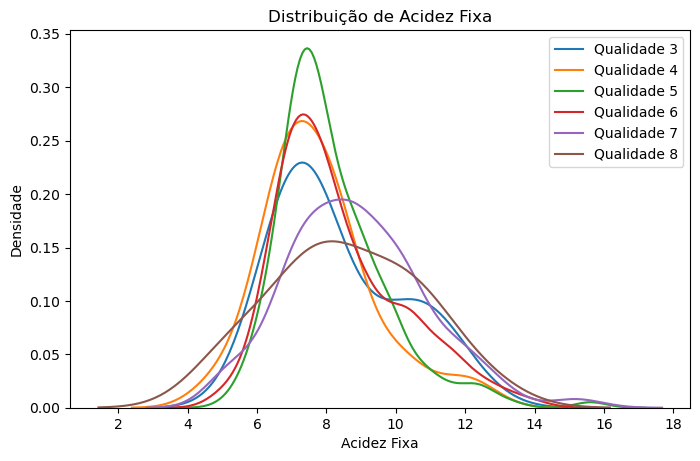

In [23]:
# Essa classificação de acidez fixa está relacionada a qualidade do vinho
# Então, cada tipo de vinho tem sua distribuição de acidez fixa

plt.figure(figsize=(8,5), dpi=100)

sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 3] ['Acidez Fixa'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 4] ['Acidez Fixa'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 5] ['Acidez Fixa'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 6] ['Acidez Fixa'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 7] ['Acidez Fixa'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 8] ['Acidez Fixa'])

plt.xlabel('Acidez Fixa')
plt.ylabel('Densidade')
plt.title('Distribuição de Acidez Fixa', fontsize=12)

plt.legend(['Qualidade 3', 'Qualidade 4', 'Qualidade 5','Qualidade 6', 'Qualidade 7', 'Qualidade 8'])

### Função da densidade de probabilidade para a variável Acidez Volátil



In [24]:
data_red_new.head()

,Acidez Fixa,Acidez Volátil,Acido Citrico,Acuçar Residual,Cloretos,Dioxido de Enxofre Livre,Dióxido de Enxofre Total,Densidade,pH,Sulfatos,Alcool,Qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Text(0.5, 1.0, 'Distribuição da Acidez Volátil')

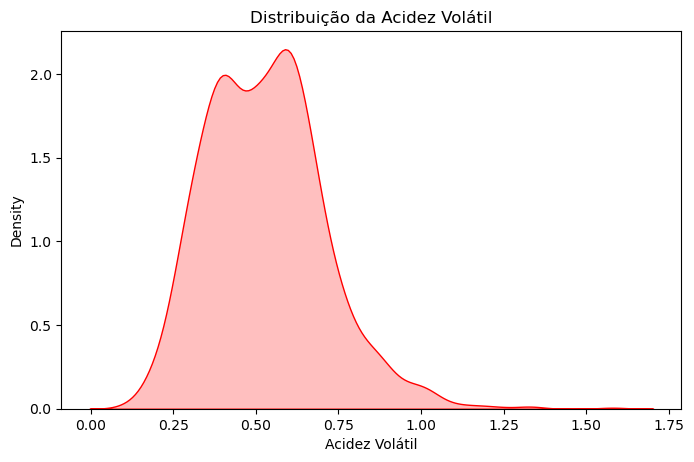

In [25]:
plt.figure(figsize=(8,5), dpi=100)

sns.kdeplot(data_red_new['Acidez Volátil'], color='red', shade=True)

plt.title('Distribuição da Acidez Volátil')

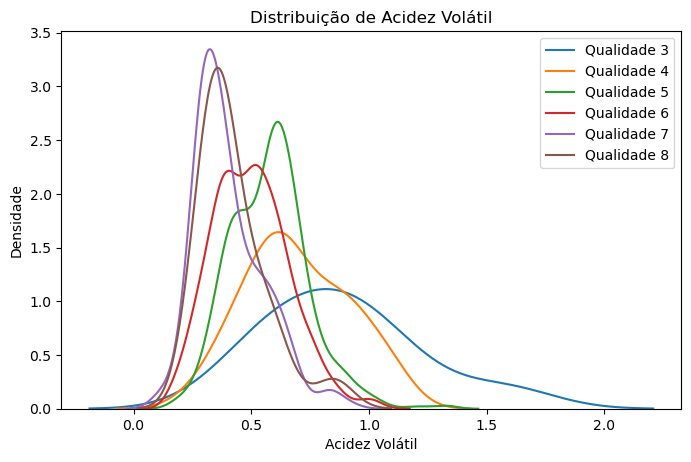

In [26]:
plt.figure(figsize=(8,5), dpi=100)

sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 3] ['Acidez Volátil'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 4] ['Acidez Volátil'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 5] ['Acidez Volátil'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 6] ['Acidez Volátil'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 7] ['Acidez Volátil'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 8] ['Acidez Volátil'])

plt.xlabel('Acidez Volátil')
plt.ylabel('Densidade')
plt.title('Distribuição de Acidez Volátil', fontsize=12)

plt.legend(['Qualidade 3', 'Qualidade 4', 'Qualidade 5','Qualidade 6', 'Qualidade 7', 'Qualidade 8'])

### Função da densidade de probabilidade para a variável Ácido Cítrico



Text(0.5, 1.0, 'Distribuição do Ácido Cítrico')

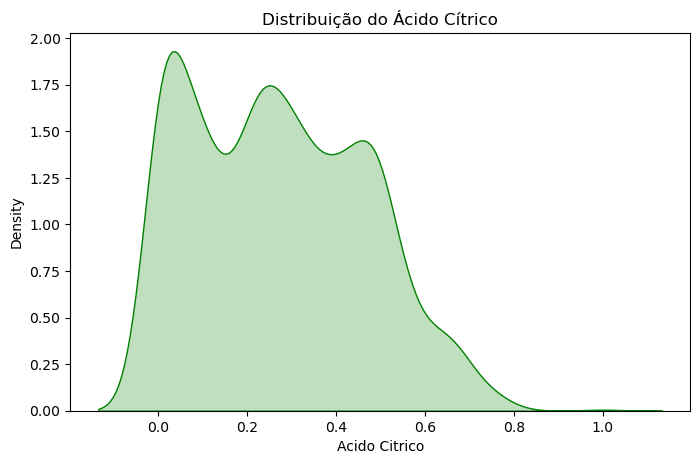

In [27]:
plt.figure(figsize=(8,5), dpi=100)

sns.kdeplot(data_red_new['Acido Citrico'], color='green', shade=True)

plt.title('Distribuição do Ácido Cítrico')

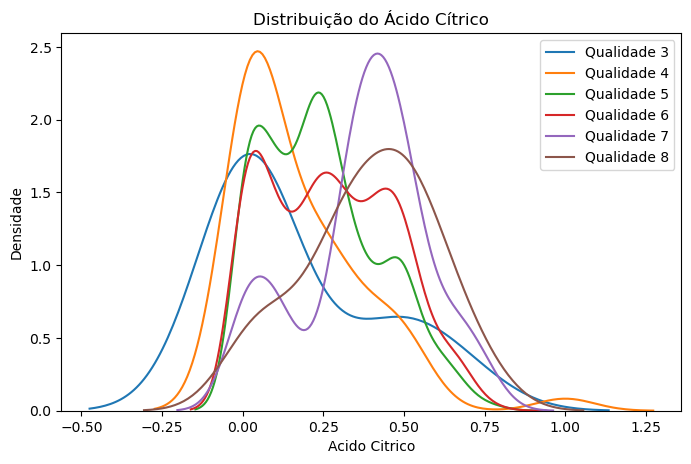

In [28]:
plt.figure(figsize=(8,5), dpi=100)

sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 3] ['Acido Citrico'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 4] ['Acido Citrico'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 5] ['Acido Citrico'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 6] ['Acido Citrico'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 7] ['Acido Citrico'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 8] ['Acido Citrico'])

plt.xlabel('Acido Citrico')
plt.ylabel('Densidade')
plt.title('Distribuição do Ácido Cítrico', fontsize=12)

plt.legend(['Qualidade 3', 'Qualidade 4', 'Qualidade 5','Qualidade 6', 'Qualidade 7', 'Qualidade 8'])

### Função da densidade de probabilidade para a variável Açúcar Residual

In [29]:
data_red_new.head()

,Acidez Fixa,Acidez Volátil,Acido Citrico,Acuçar Residual,Cloretos,Dioxido de Enxofre Livre,Dióxido de Enxofre Total,Densidade,pH,Sulfatos,Alcool,Qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Text(0.5, 1.0, 'Distribuição do Acuçar Residual')

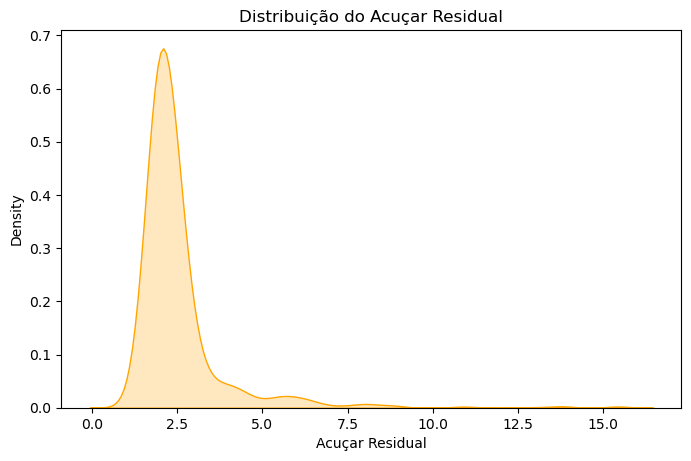

In [30]:
plt.figure(figsize=(8,5), dpi=100)

sns.kdeplot(data_red_new['Acuçar Residual'], color='orange', shade=True)

plt.title('Distribuição do Acuçar Residual')

Percebe-se que a distribuição do açucar resdiual da qualidade 5 é bem parecida com a qualidade 6.


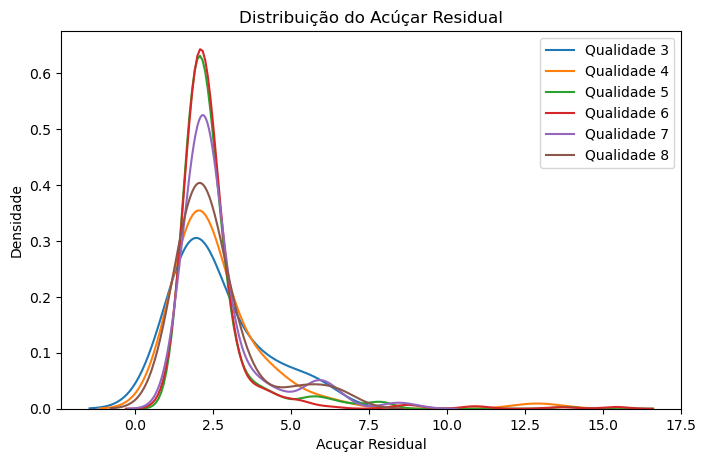

In [31]:
plt.figure(figsize=(8,5), dpi=100)

sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 3] ['Acuçar Residual'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 4] ['Acuçar Residual'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 5] ['Acuçar Residual'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 6] ['Acuçar Residual'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 7] ['Acuçar Residual'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 8] ['Acuçar Residual'])

plt.xlabel('Acuçar Residual')
plt.ylabel('Densidade')
plt.title('Distribuição do Acúçar Residual', fontsize=12)

plt.legend(['Qualidade 3', 'Qualidade 4', 'Qualidade 5','Qualidade 6', 'Qualidade 7', 'Qualidade 8'])

print("Percebe-se que a distribuição do açucar resdiual da qualidade 5 é bem parecida com a qualidade 6.")

### Função da densidade de probabilidade para a variável Cloretos

Text(0.5, 1.0, 'Distribuição do Cloreto')

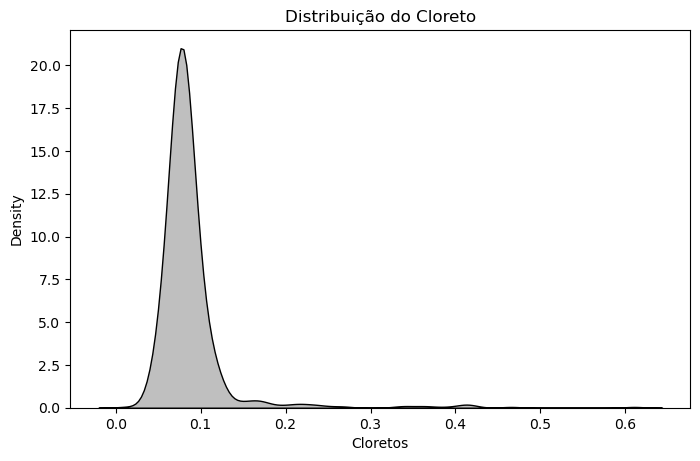

In [32]:
plt.figure(figsize=(8,5), dpi=100)

sns.kdeplot(data_red_new['Cloretos'], color='black', shade=True)

plt.title('Distribuição do Cloreto')

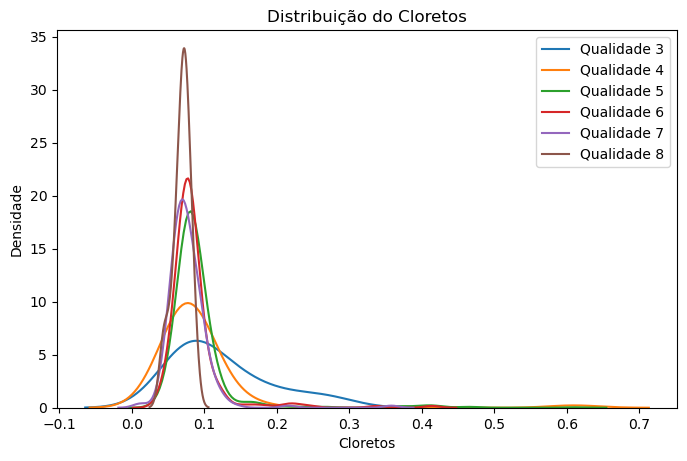

In [33]:
plt.figure(figsize=(8,5), dpi=100)

sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 3] ['Cloretos'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 4] ['Cloretos'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 5] ['Cloretos'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 6] ['Cloretos'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 7] ['Cloretos'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 8] ['Cloretos'])

plt.xlabel('Cloretos')
plt.ylabel('Densidade')
plt.title('Distribuição do Cloretos', fontsize=12)

plt.legend(['Qualidade 3', 'Qualidade 4', 'Qualidade 5','Qualidade 6', 'Qualidade 7', 'Qualidade 8'])

### Função da densidade de probabilidade para a variável Enxofre Livre


Text(0.5, 1.0, 'Distribuição do Dioxido de Enxofre Livre')

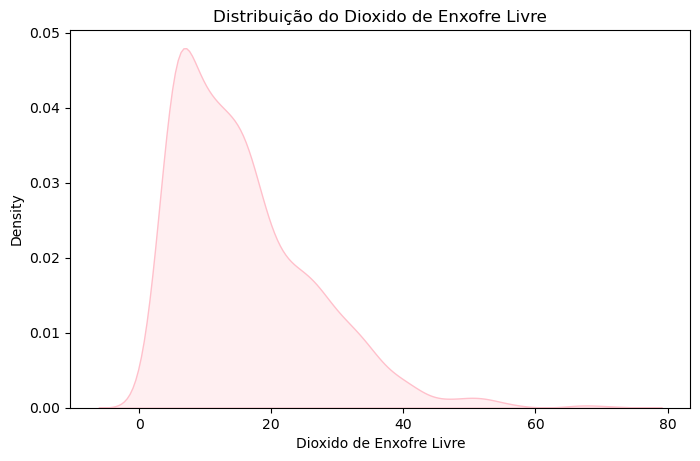

In [34]:
plt.figure(figsize=(8,5), dpi=100)

sns.kdeplot(data_red_new['Dioxido de Enxofre Livre'], color='pink', shade=True)

plt.title('Distribuição do Dioxido de Enxofre Livre')

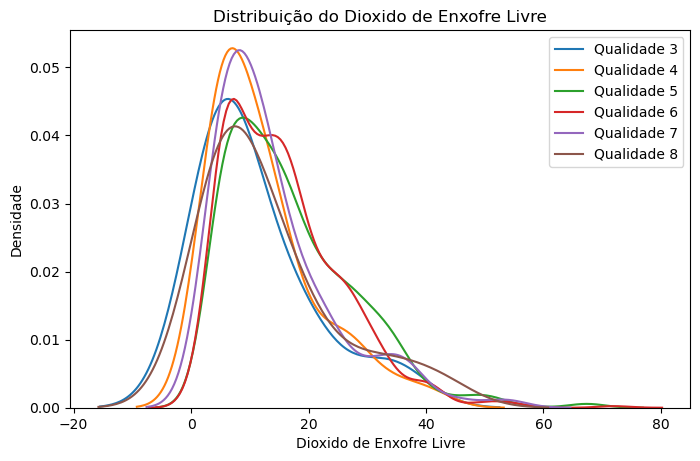

In [35]:
plt.figure(figsize=(8,5), dpi=100)

sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 3] ['Dioxido de Enxofre Livre'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 4] ['Dioxido de Enxofre Livre'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 5] ['Dioxido de Enxofre Livre'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 6] ['Dioxido de Enxofre Livre'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 7] ['Dioxido de Enxofre Livre'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 8] ['Dioxido de Enxofre Livre'])

plt.xlabel('Dioxido de Enxofre Livre')
plt.ylabel('Densidade')
plt.title('Distribuição do Dioxido de Enxofre Livre', fontsize=12)

plt.legend(['Qualidade 3', 'Qualidade 4', 'Qualidade 5','Qualidade 6', 'Qualidade 7', 'Qualidade 8'])

### Função da densidade de probabilidade para a variável Enxofre Total


In [36]:
data_red_new.head()

,Acidez Fixa,Acidez Volátil,Acido Citrico,Acuçar Residual,Cloretos,Dioxido de Enxofre Livre,Dióxido de Enxofre Total,Densidade,pH,Sulfatos,Alcool,Qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Text(0.5, 1.0, 'Distribuição do Dióxido de Enxofre Total')

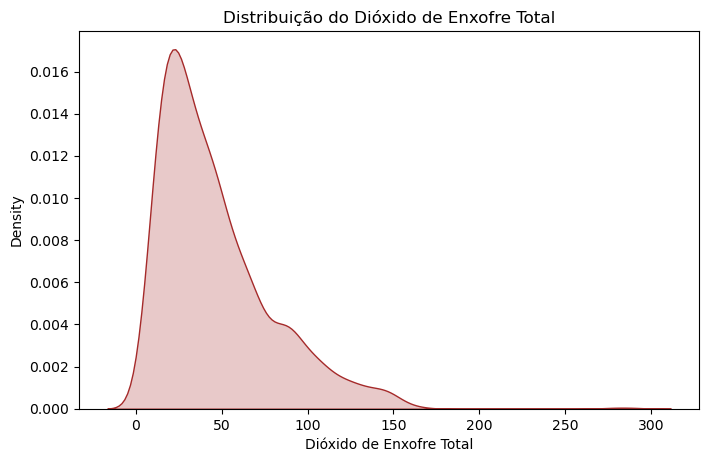

In [37]:
plt.figure(figsize=(8,5), dpi=100)

sns.kdeplot(data_red_new['Dióxido de Enxofre Total'], color='brown', shade=True)

plt.title('Distribuição do Dióxido de Enxofre Total')

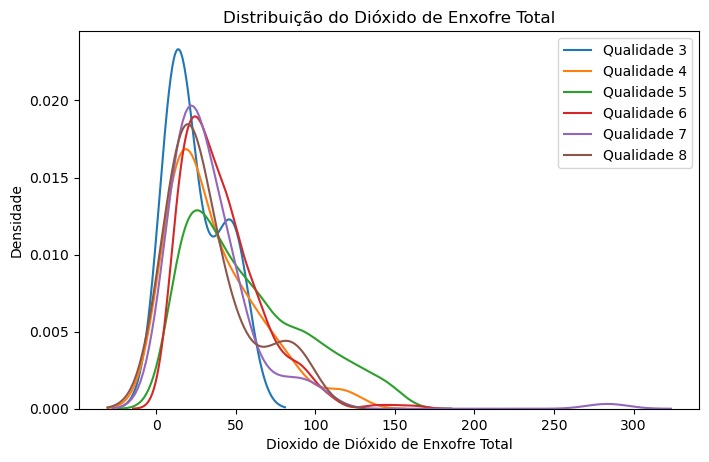

In [38]:
plt.figure(figsize=(8,5), dpi=100)

sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 3] ['Dióxido de Enxofre Total'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 4] ['Dióxido de Enxofre Total'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 5] ['Dióxido de Enxofre Total'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 6] ['Dióxido de Enxofre Total'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 7] ['Dióxido de Enxofre Total'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 8] ['Dióxido de Enxofre Total'])

plt.xlabel('Dioxido de Dióxido de Enxofre Total')
plt.ylabel('Densidade')
plt.title('Distribuição do Dióxido de Enxofre Total', fontsize=12)

plt.legend(['Qualidade 3', 'Qualidade 4', 'Qualidade 5','Qualidade 6', 'Qualidade 7', 'Qualidade 8'])

### Função da densidade de probabilidade para a variável Densidade

Text(0.5, 1.0, 'Distribuição da Densidade')

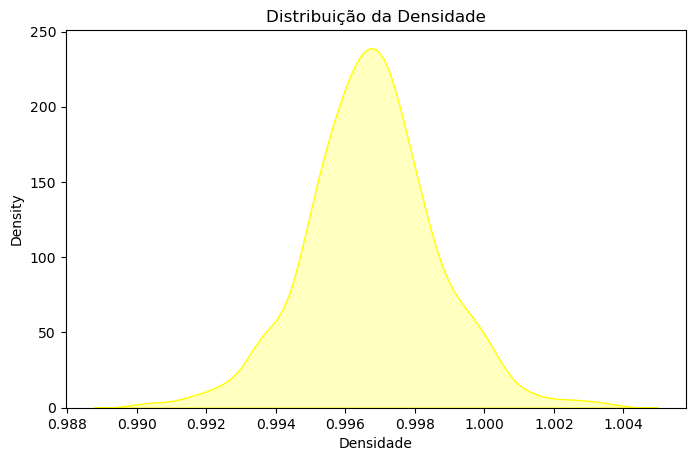

In [39]:
plt.figure(figsize=(8,5), dpi=100)

sns.kdeplot(data_red_new['Densidade'], color='yellow', shade=True)

plt.title('Distribuição da Densidade')

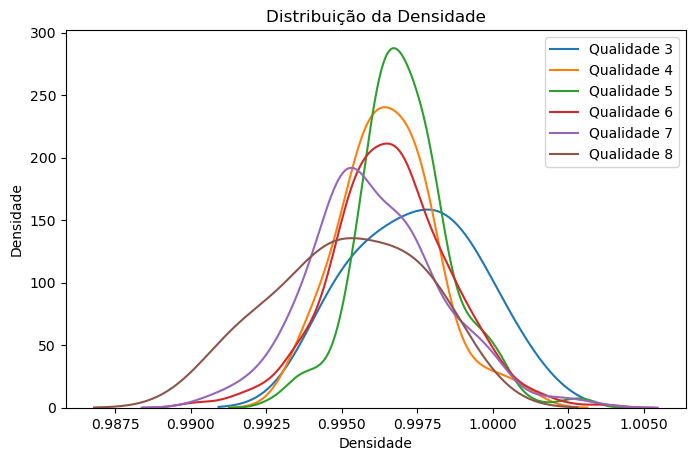

In [40]:
plt.figure(figsize=(8,5), dpi=100)

sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 3] ['Densidade'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 4] ['Densidade'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 5] ['Densidade'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 6] ['Densidade'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 7] ['Densidade'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 8] ['Densidade'])

plt.xlabel('Densidade')
plt.ylabel('Densidade')
plt.title('Distribuição da Densidade', fontsize=12)

plt.legend(['Qualidade 3', 'Qualidade 4', 'Qualidade 5','Qualidade 6', 'Qualidade 7', 'Qualidade 8'])

### Função da densidade de probabilidade para a variável pH


Text(0.5, 1.0, 'Distribuição do pH')

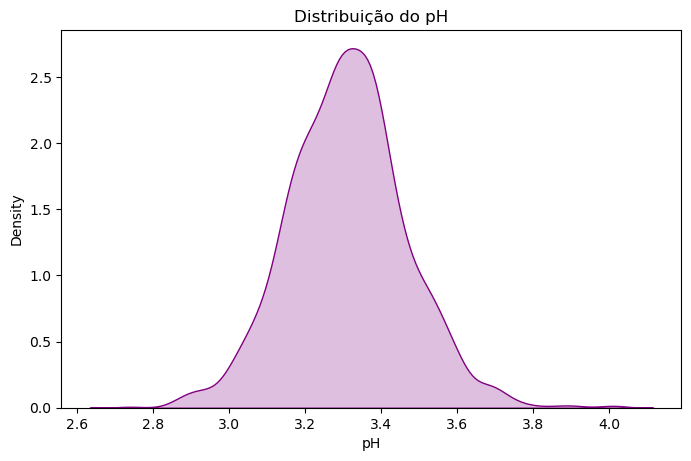

In [41]:
plt.figure(figsize=(8,5), dpi=100)

sns.kdeplot(data_red_new['pH'], color='purple', shade=True)

plt.title('Distribuição do pH')

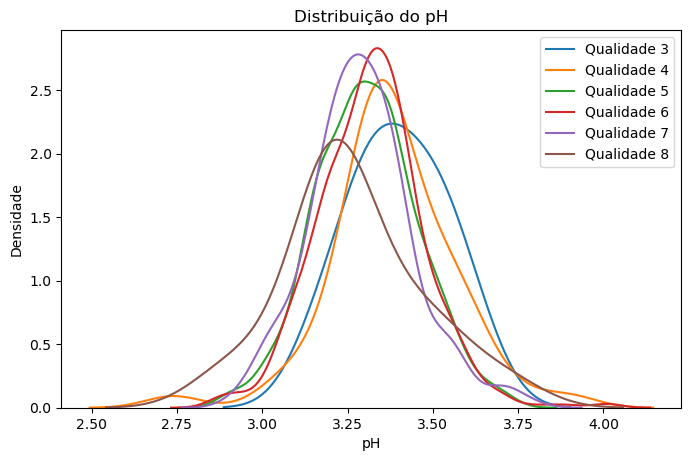

In [42]:
plt.figure(figsize=(8,5), dpi=100)

sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 3] ['pH'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 4] ['pH'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 5] ['pH'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 6] ['pH'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 7] ['pH'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 8] ['pH'])

plt.xlabel('pH')
plt.ylabel('Densidade')
plt.title('Distribuição do pH', fontsize=12)

plt.legend(['Qualidade 3', 'Qualidade 4', 'Qualidade 5','Qualidade 6', 'Qualidade 7', 'Qualidade 8'])

### Função da densidade de probabilidade para a variável Sulfato


In [43]:
data_red_new.head()

,Acidez Fixa,Acidez Volátil,Acido Citrico,Acuçar Residual,Cloretos,Dioxido de Enxofre Livre,Dióxido de Enxofre Total,Densidade,pH,Sulfatos,Alcool,Qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Text(0.5, 1.0, 'Distribuição do Sulfato')

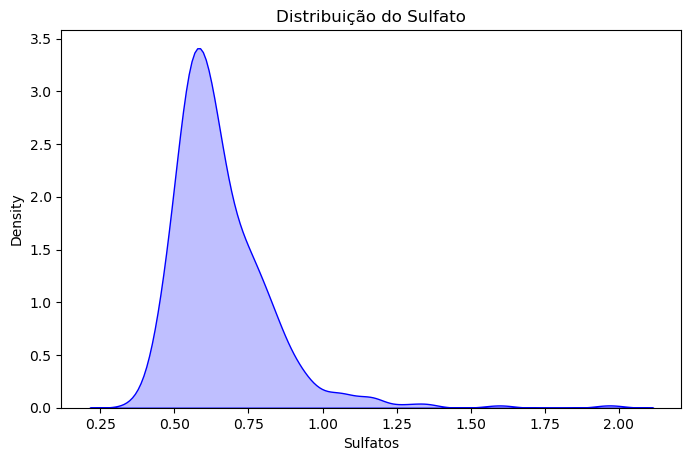

In [44]:
plt.figure(figsize=(8,5), dpi=100)

sns.kdeplot(data_red_new['Sulfatos'], color='blue', shade=True)

plt.title('Distribuição do Sulfato')

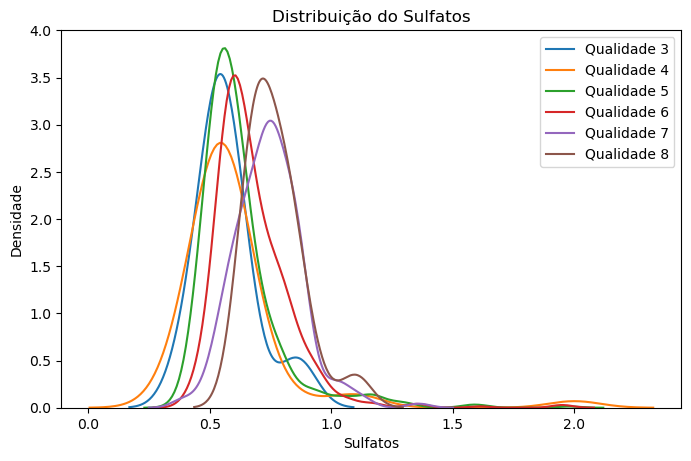

In [45]:
plt.figure(figsize=(8,5), dpi=100)

sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 3] ['Sulfatos'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 4] ['Sulfatos'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 5] ['Sulfatos'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 6] ['Sulfatos'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 7] ['Sulfatos'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 8] ['Sulfatos'])

plt.xlabel('Sulfatos')
plt.ylabel('Densidade')
plt.title('Distribuição do Sulfatos', fontsize=12)

plt.legend(['Qualidade 3', 'Qualidade 4', 'Qualidade 5','Qualidade 6', 'Qualidade 7', 'Qualidade 8'])

### Função da densidade de probabilidade para a variável Álcoos

Text(0.5, 1.0, 'Distribuição do Alcool')

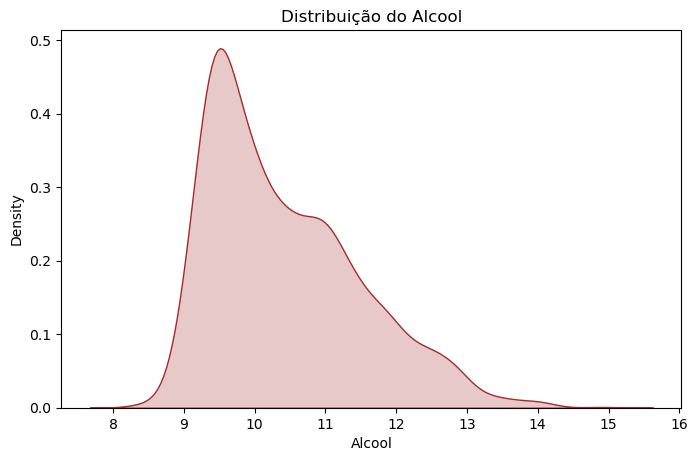

In [46]:
plt.figure(figsize=(8,5), dpi=100)

sns.kdeplot(data_red_new['Alcool'], color='brown', shade=True)

plt.title('Distribuição do Alcool')

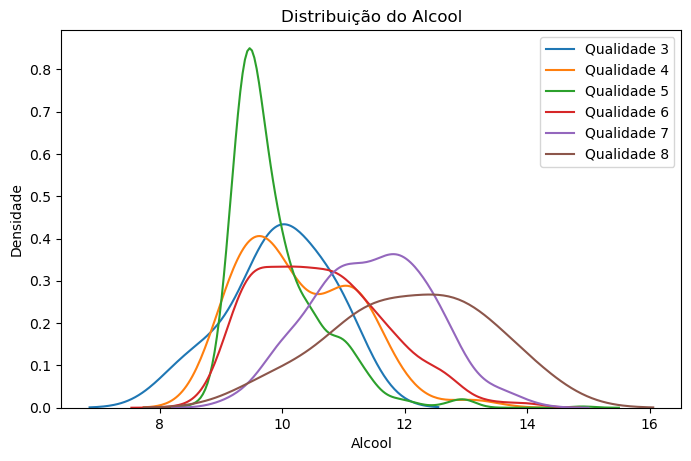

In [47]:
plt.figure(figsize=(8,5), dpi=100)

sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 3] ['Alcool'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 4] ['Alcool'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 5] ['Alcool'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 6] ['Alcool'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 7] ['Alcool'])
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 8] ['Alcool'])

plt.xlabel('Alcool')
plt.ylabel('Densidade')
plt.title('Distribuição do Alcool', fontsize=12)

plt.legend(['Qualidade 3', 'Qualidade 4', 'Qualidade 5','Qualidade 6', 'Qualidade 7', 'Qualidade 8'])

### Mapa de Calor para ver a correlação entre as variáveis

As correlações variam de -1-0-1

- Correlações Positivas: As correlações positivas estão relacionadas a aumento da ambas as variáveis, quando uma aumenta a outra aumenta consequentemente.

- Correlações Negativas: As correlações negativas estão relacionadas ao crescimento e decrescimento das variáveis, quando uma aumenta a outra diminuí e assim o oposto.

##### Link explicando Correlação: https://medium.com/omixdata/estat%C3%ADstica-an%C3%A1lise-de-correla%C3%A7%C3%A3o-usando-python-e-r-d68611511b5a

##### Link explicando Causalidade: https://medium.com/data-hackers/introdu%C3%A7%C3%A3o-%C3%A0-infer%C3%AAncia-causal-ed3da2c12da4

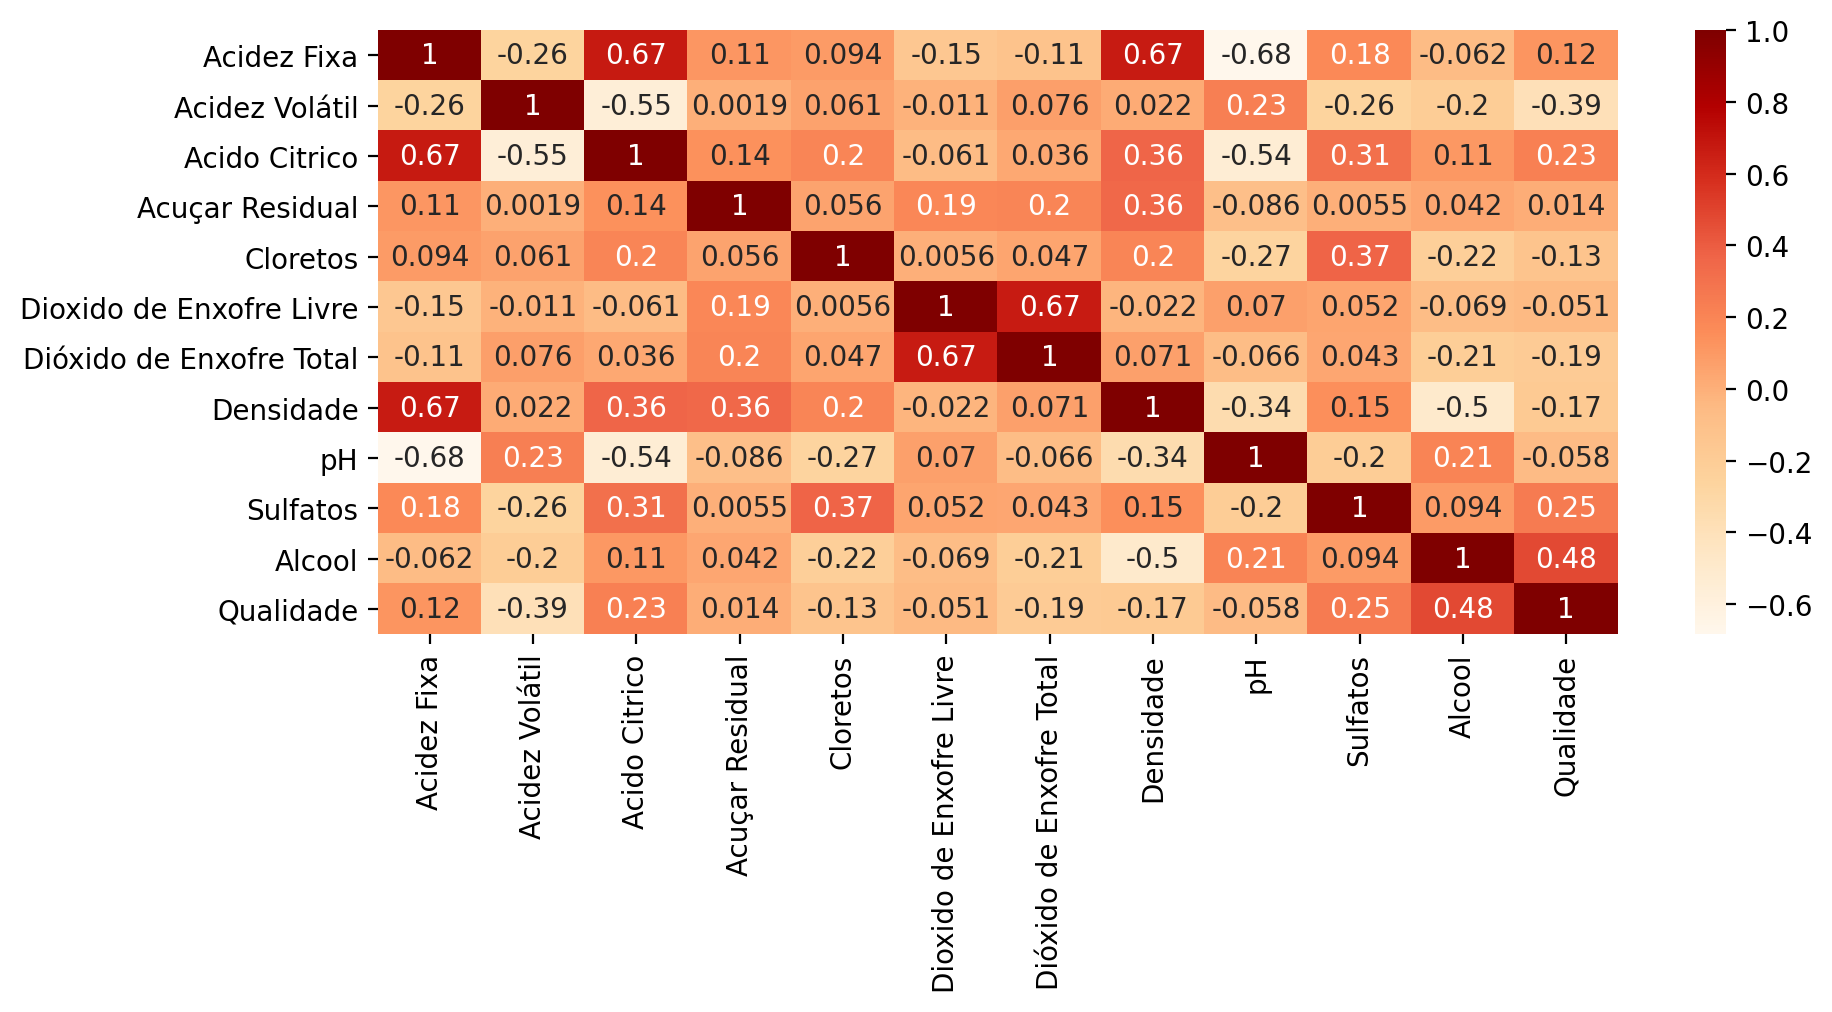

In [48]:
plt.figure(figsize=(10,4), dpi=200)

sns.heatmap(data_red_new.corr(), annot=True, cmap='OrRd')

plt.show()

###### Correlação positiva:
    - Densidade e Acidez Fixa: 67% 
    - Ácido Cítrico e Acidez Fixa: 67% 
    - Dióxido de Enxofre Total e Dióxido de Enxofre Livre: 67%

###### Correlação media:
    - Álcool e qualidade: 48%
    
###### Correlação negativa:
    - pH e Ácido Cítrico: -54%
    - Densidade e Álcool: -50%
    - pHe Acidez Fixa: -68%

In [49]:
data_red_new.corr()['Qualidade'].sort_values() # Colocando os valores em ordem crescente 

Acidez Volátil             -0.390558
Dióxido de Enxofre Total   -0.185100
Densidade                  -0.174919
Cloretos                   -0.128907
pH                         -0.057731
Dioxido de Enxofre Livre   -0.050656
Acuçar Residual             0.013732
Acidez Fixa                 0.124052
Acido Citrico               0.226373
Sulfatos                    0.251397
Alcool                      0.476166
Qualidade                   1.000000
Name: Qualidade, dtype: float64

### Pré-Processamento dos dados
É a etapa de definição das variáveis que serão utilizadas no processo de aplicação dos modelos preditivos.

Transformando a variável 'Qualidade' em duas variáveis, 'bom' ou 'ruim'. 

In [50]:
bins = (2, 5, 8)
data_red_new['Qualidade'] = pd.cut(data_red_new['Qualidade'], bins= bins, labels= ['Bom', 'Ruim'])

In [51]:
data_red_new.head()

,Acidez Fixa,Acidez Volátil,Acido Citrico,Acuçar Residual,Cloretos,Dioxido de Enxofre Livre,Dióxido de Enxofre Total,Densidade,pH,Sulfatos,Alcool,Qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bom
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Bom
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Bom
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Ruim
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bom


In [52]:
data_red_new['Qualidade'].value_counts() # Contando a quantidade de valores na coluna 'Qualidade'

Ruim    855
Bom     744
Name: Qualidade, dtype: int64

##### Distribuição da Acidez Fixa para as qualidade

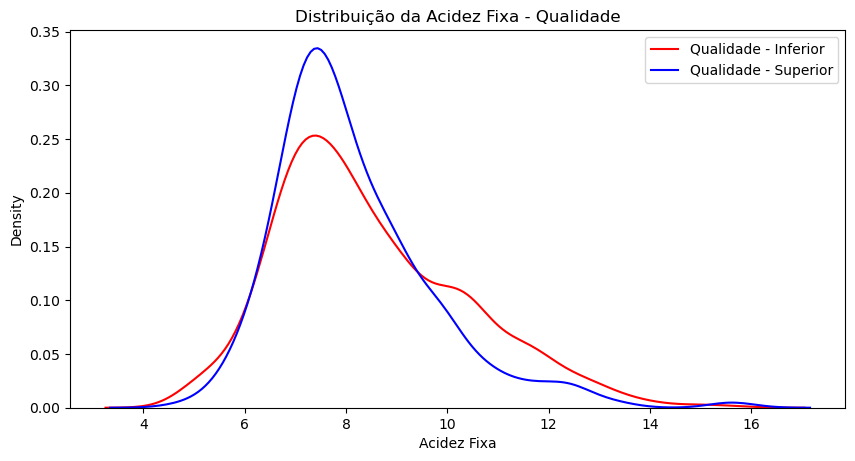

In [53]:
plt.figure(figsize=(10,5), dpi=100)

sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 'Ruim']['Acidez Fixa'], label='Qualidade - Inferior', color='red')
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 'Bom']['Acidez Fixa'], label='Qualidade - Superior', color='blue')
plt.title('Distribuição da Acidez Fixa - Qualidade')

plt.legend()

##### Distribuição da Acidez Volátil para as qualidade

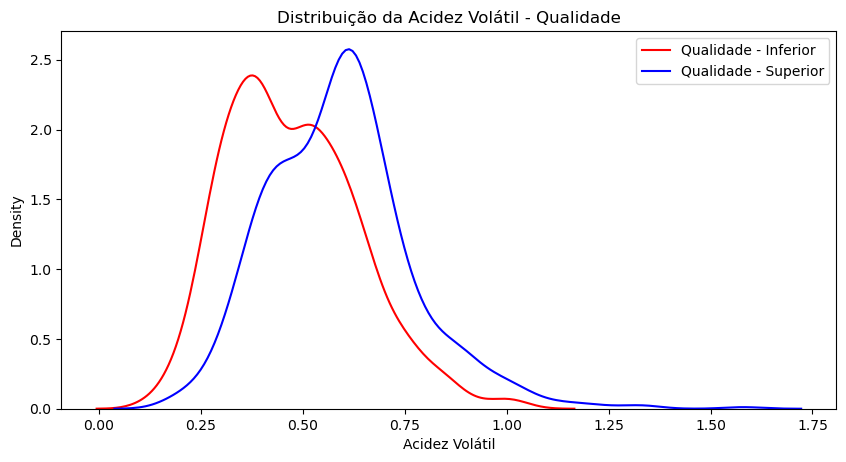

In [54]:
plt.figure(figsize=(10,5), dpi=100)

sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 'Ruim']['Acidez Volátil'], label='Qualidade - Inferior', color='red')
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 'Bom']['Acidez Volátil'], label='Qualidade - Superior', color='blue')
plt.title('Distribuição da Acidez Volátil - Qualidade')

plt.legend()

##### Distribuição do Acido Citrico para as qualidade

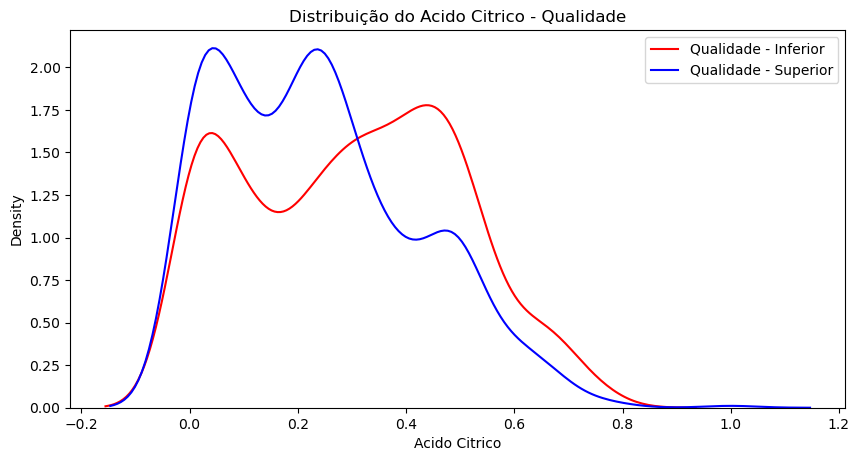

In [55]:
plt.figure(figsize=(10,5), dpi=100)

sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 'Ruim']['Acido Citrico'], label='Qualidade - Inferior', color='red')
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 'Bom']['Acido Citrico'], label='Qualidade - Superior', color='blue')
plt.title('Distribuição do Acido Citrico - Qualidade')

plt.legend()

##### Distribuição do Açúcar Residual para as qualidade

In [56]:
data_red_new.head()

,Acidez Fixa,Acidez Volátil,Acido Citrico,Acuçar Residual,Cloretos,Dioxido de Enxofre Livre,Dióxido de Enxofre Total,Densidade,pH,Sulfatos,Alcool,Qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bom
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Bom
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Bom
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Ruim
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bom


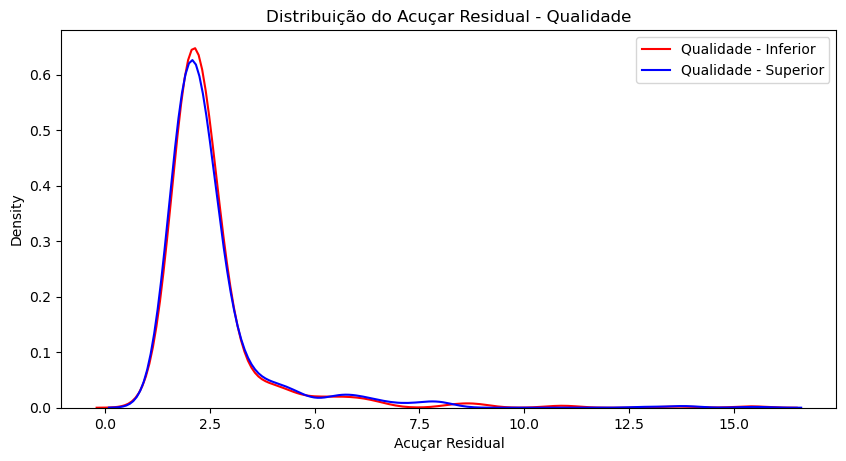

In [57]:
plt.figure(figsize=(10,5), dpi=100)

sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 'Ruim']['Acuçar Residual'], label='Qualidade - Inferior', color='red')
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 'Bom']['Acuçar Residual'], label='Qualidade - Superior', color='blue')
plt.title('Distribuição do Acuçar Residual - Qualidade')

plt.legend()

##### Distribuição do Cloretos para as qualidade

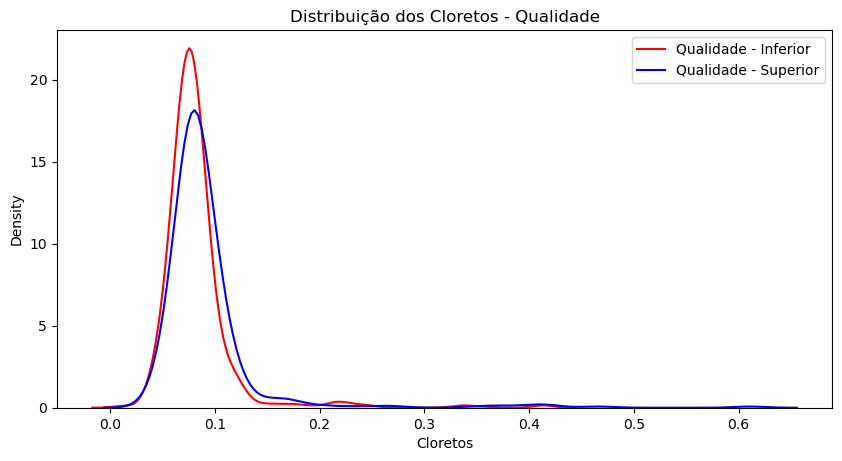

In [58]:
plt.figure(figsize=(10,5), dpi=100)

sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 'Ruim']['Cloretos'], label='Qualidade - Inferior', color='red')
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 'Bom']['Cloretos'], label='Qualidade - Superior', color='blue')
plt.title('Distribuição dos Cloretos - Qualidade')

plt.legend()

##### Distribuição do Dioxido de Enxofre Livre para as qualidade

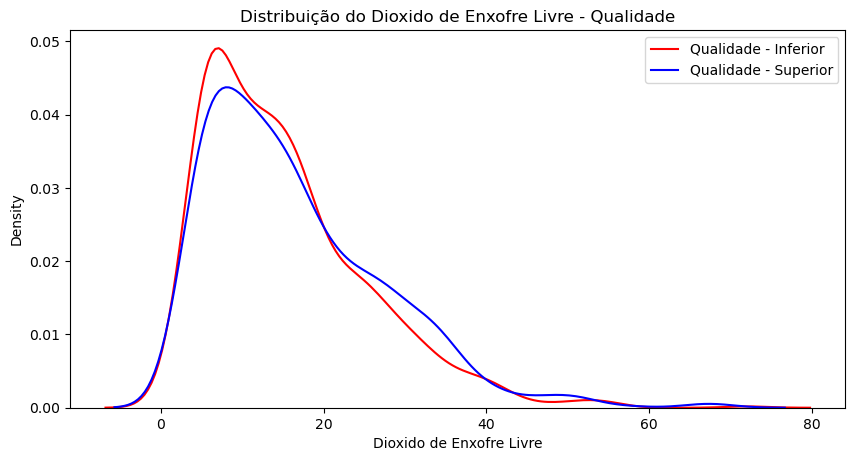

In [59]:
plt.figure(figsize=(10,5), dpi=100)

sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 'Ruim']['Dioxido de Enxofre Livre'], label='Qualidade - Inferior', color='red')
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 'Bom']['Dioxido de Enxofre Livre'], label='Qualidade - Superior', color='blue')
plt.title('Distribuição do Dioxido de Enxofre Livre - Qualidade')

plt.legend()

##### Distribuição do Dioxido de Enxofre Total para as qualidade

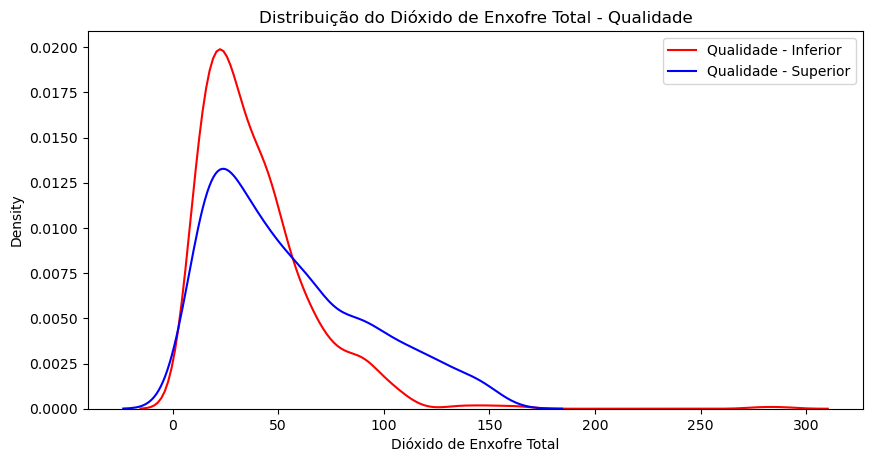

In [60]:
plt.figure(figsize=(10,5), dpi=100)

sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 'Ruim']['Dióxido de Enxofre Total'], label='Qualidade - Inferior', color='red')
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 'Bom']['Dióxido de Enxofre Total'], label='Qualidade - Superior', color='blue')
plt.title('Distribuição do Dióxido de Enxofre Total - Qualidade')

plt.legend()

##### Distribuição da Densidade para as qualidade

In [61]:
data_red_new.head()

,Acidez Fixa,Acidez Volátil,Acido Citrico,Acuçar Residual,Cloretos,Dioxido de Enxofre Livre,Dióxido de Enxofre Total,Densidade,pH,Sulfatos,Alcool,Qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bom
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Bom
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Bom
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Ruim
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bom


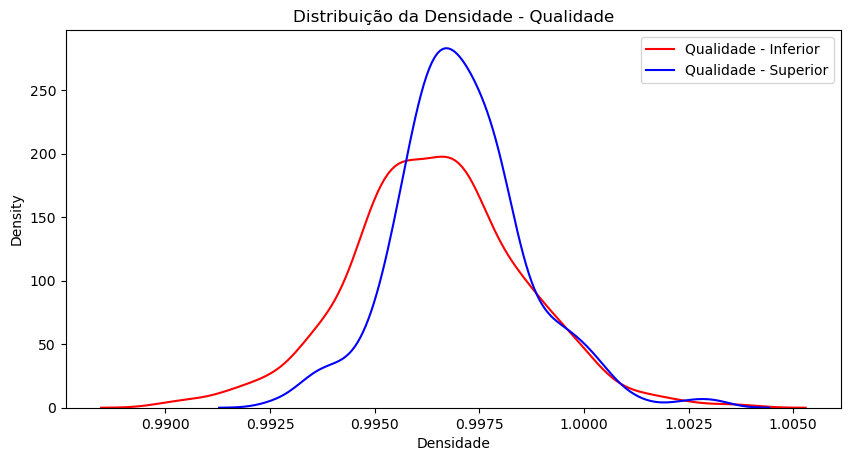

In [62]:
plt.figure(figsize=(10,5), dpi=100)

sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 'Ruim']['Densidade'], label='Qualidade - Inferior', color='red')
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 'Bom']['Densidade'], label='Qualidade - Superior', color='blue')
plt.title('Distribuição da Densidade - Qualidade')

plt.legend()

##### Distribuição do pH para as qualidade

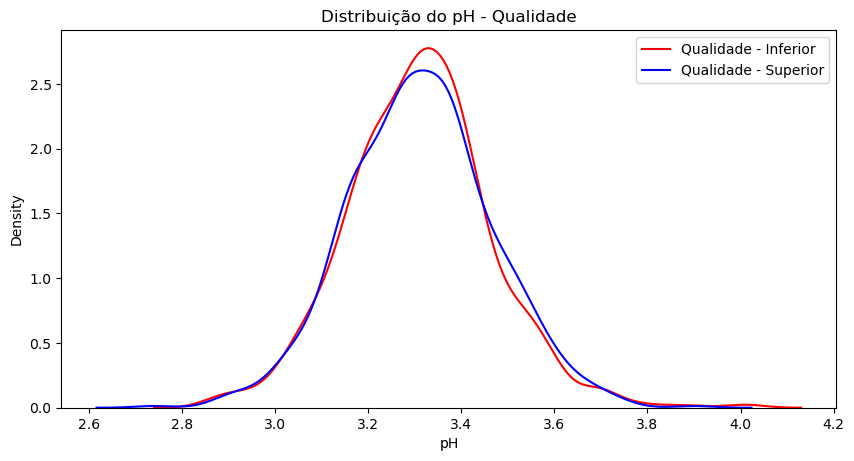

In [63]:
plt.figure(figsize=(10,5), dpi=100)

sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 'Ruim']['pH'], label='Qualidade - Inferior', color='red')
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 'Bom']['pH'], label='Qualidade - Superior', color='blue')
plt.title('Distribuição do pH - Qualidade')

plt.legend()

##### Distribuição dos Sulfatos para as qualidade

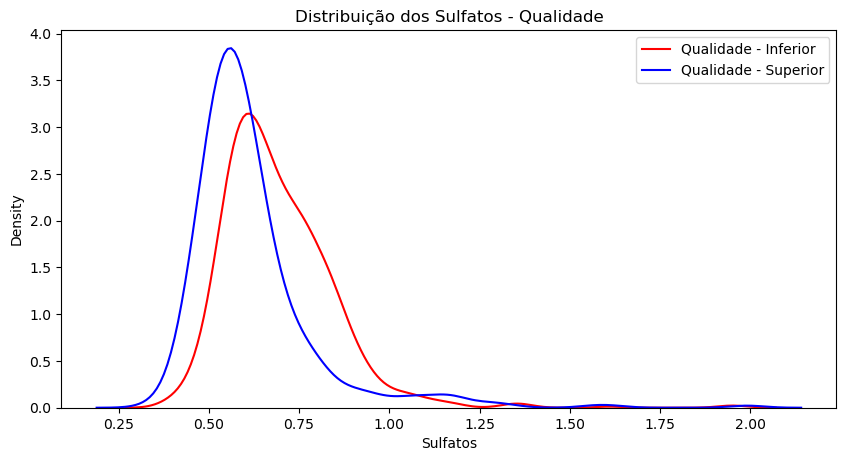

In [64]:
plt.figure(figsize=(10,5), dpi=100)

sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 'Ruim']['Sulfatos'], label='Qualidade - Inferior', color='red')
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 'Bom']['Sulfatos'], label='Qualidade - Superior', color='blue')
plt.title('Distribuição dos Sulfatos - Qualidade')

plt.legend()

##### Distribuição dos Alcool para as qualidades

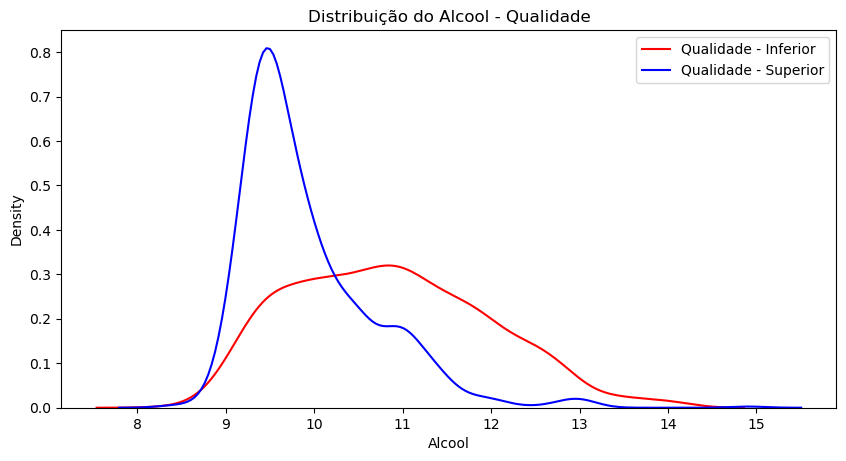

In [65]:
plt.figure(figsize=(10,5), dpi=100)

sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 'Ruim']['Alcool'], label='Qualidade - Inferior', color='red')
sns.kdeplot(data_red_new[data_red_new['Qualidade'] == 'Bom']['Alcool'], label='Qualidade - Superior', color='blue')
plt.title('Distribuição do Alcool - Qualidade')

plt.legend()

##### Análise dos Gráficos a cima:

#### Realizando agora os passos para determinação dos estudos em Machine Learning

In [66]:
# Definindo X e y

X = data_red_new.drop('Qualidade', axis=1) # A variável x está recebendo quase todas as colunas, exceto a coluna 'Qualidade'
Y = data_red_new['Qualidade'] # A variável y está recebendo somente a coluna 'Qualidade'

In [67]:
# Importando a biblioteca necessária para realização dos testes

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X[:1599], Y, test_size = 0.2, random_state = 42)

# A ideia do train_test_split é determinação de subconjuntos aleatórios que minimizam o viés em seu processo de avalidação e validação
# Em suma, é a separação dos dados em subconjuntos aleatórios para evitar o overfit e o underfit
# Link para mais informações sobre: https://realpython.com/train-test-split-python-data/

In [68]:
X_train.shape, Y_train.shape # Ambos os dataframes devem possuir a mesma dimensão

((1279, 11), (1279,))

In [69]:
X_test.shape, Y_test.shape # Ambos os dataframes devem possuir a mesma dimensão

((320, 11), (320,))

#### Aplicando os modelos

Para aplicação dos modelos é necessário que os dados estejam tratados como anteriormente. 

- Regressão logistica
- K-Vizinhos
- Árvore de decisão
- Floresta aleatória
- Árvore decisão

## 1 - Modelo: Regressão logística

In [70]:
# Importando as bibliotecas necessárias
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

lr = LogisticRegression() # Atribuindo a função a uma variável, para poder utilizar sem precisar instanciar a função novamente
lr.fit(X_train, Y_train) # Está treinando a máquina com os valores de treinamento
pred_proba_lr = lr.predict_proba(X_test) # Já quando a máquina está treinada você passa o X_test para realmente testar com os valores desejados
pred_lr = lr.predict(X_test)

# predict_proba() retorna as probabilidades de classe para cada ponto de dado
# O predict() é usado para prever a classe real, enquanto predict_proba() pode ser usado para inferir 
# as probabilidades da classe (ou seja, a probabilidade de que um determinado ponto de dados caia nas classes subjacentes).

C:\Users\Francisco\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 2 - Modelo: K-vizinhos

In [71]:
# Importando as bibliotecas necessárias

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train) # Treinando o modelo
knn_proba = knn.predict_proba(X_test)
knn_predict = knn.predict(X_test)

# predict_proba() retorna as probabilidades de classe para cada ponto de dado
# O predict() é usado para prever a classe real, enquanto predict_proba() pode ser usado para inferir 
# as probabilidades da classe (ou seja, a probabilidade de que um determinado ponto de dados caia nas classes subjacentes).

# 3 - Modelo: Árvore de Decisão

In [72]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train) # Treinando o modelo
dt_proba = dt.predict_proba(X_test)
pred_dt = dt.predict(X_test)

# predict_proba() retorna as probabilidades de classe para cada ponto de dado
# O predict() é usado para prever a classe real, enquanto predict_proba() pode ser usado para inferir 
# as probabilidades da classe (ou seja, a probabilidade de que um determinado ponto de dados caia nas classes subjacentes).

# 4 - Modelo: Random Forest 

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
pred_rf = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)

rf.score(X_test, Y_test) # Conferindo o score do teste realizado no Random Forest

0.796875

# 5 - Modelo: Support Vector Machine

In [74]:
from sklearn import svm

sv = svm.SVC()
sv.fit(X_train, Y_train)
pred_sv = sv.predict(X_test)

# 6 - Modelo: XGBOOST

In [75]:
# Instalar o pacote
! pip install xgboost 

###### Ver mais sobre o LabelEncoder em: https://stackoverflow.com/questions/71996617/invalid-classes-inferred-from-unique-values-of-y-expected-0-1-2-3-4-5-got

###### Essa transformação necessária do código está afetando todos os outros processos, então por isso não foi rodada. 
###### Será rodada no final do código para comparação

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # Foi necessário trabalhar com essa biblioteca para realizar a transformação categórica
Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)

xg = XGBClassifier()
xg.fit(X_train, Y_train)
pred_xg = xg.predict(X_test)

print(classification_report(Y_test, pred_xg))

# Métricas de Avaliação    

#### Texto tirado do artigo do autor que estava explicando - GitHub: Patotricks15 

Durante o processo de criação de um modelo de machine learning nós precisamos medir a qualidade dele de acordo com o objetivo da tarefa. Existem funções matemáticas que nos ajudam a avaliar a capacidade de erro e acerto dos nossos modelos, e agora você conhecerá algumas das mais utilizadas. No artigo, usarei a palavra métrica para me referir a essas funções.

Tão importante quanto saber escolher um bom modelo, é saber escolher a métrica correta para decidir qual é o melhor entre eles.

Existem métricas mais simples, outras mais complexas, algumas que funcionam melhor para datasets com determinadas características, ou outras personalizadas de acordo com o objetivo final do modelo.

Ao escolher uma métrica deve-se levar em consideração fatores como a proporção de dados de cada classe no dataset e o objetivo da previsão (probabilidade, binário, ranking, etc). Por isso é importante conhecer bem a métrica que será utilizada, já que isso pode fazer a diferença na prática.

Nenhuma destas funções é melhor do que as outras em todos os casos. É sempre importante levar em consideração a aplicação prática do modelo. O objetivo deste artigo não é ir a fundo em cada uma delas, mas apresentá-las para que você possa pesquisar mais sobre as que achar interessante.

###### Regressão Logística

In [76]:
bom_lr = 0
ruim_lr = 0

print('------------------------------------')
print(classification_report(Y_test, pred_lr))
print('------------------------------------')

for item in range(len(pred_lr)):
    if pred_lr[item] == 'Bom':
        bom_lr = bom_lr + 1
    elif pred_lr[item] == 'Ruim':
        ruim_lr = ruim_lr + 1

print('Quantidade de Vinhos bons: ', bom_lr)
print('Quantidade de Vinhos ruins: ', ruim_lr)

------------------------------------
              precision    recall  f1-score   support

         Bom       0.70      0.74      0.72       141
        Ruim       0.78      0.75      0.77       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320

------------------------------------
Quantidade de Vinhos bons:  149
Quantidade de Vinhos ruins:  171


###### K-vizinhos

In [77]:
print('------------------------------------')
print(classification_report(Y_test, knn_predict))
print('------------------------------------')

bom_knn = 0
ruim_knn = 0

for item in range(len(knn_predict)):
    if knn_predict[item] == 'Bom':
        bom_knn = bom_knn + 1
    elif knn_predict[item] == 'Ruim':
        ruim_knn = ruim_knn + 1

print('Quantidade de Vinhos bons: ', bom_knn)
print('Quantidade de Vinhos ruins: ', ruim_knn)

------------------------------------
              precision    recall  f1-score   support

         Bom       0.56      0.57      0.57       141
        Ruim       0.66      0.64      0.65       179

    accuracy                           0.61       320
   macro avg       0.61      0.61      0.61       320
weighted avg       0.61      0.61      0.61       320

------------------------------------
Quantidade de Vinhos bons:  145
Quantidade de Vinhos ruins:  175


###### Árvore de decisão

In [78]:
print('------------------------------------')
print(classification_report(Y_test, pred_dt))
print('------------------------------------')

bom_dt = 0
ruim_dt = 0

for item in range(len(pred_dt)):
    if pred_dt[item] == 'Bom':
        bom_dt = bom_dt + 1
    elif pred_dt[item] == 'Ruim':
        ruim_dt = ruim_dt + 1

print('Quantidade de Vinhos bons: ', bom_dt)
print('Quantidade de Vinhos ruins: ', ruim_dt)

------------------------------------
              precision    recall  f1-score   support

         Bom       0.69      0.72      0.70       141
        Ruim       0.77      0.74      0.76       179

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.73      0.73      0.73       320

------------------------------------
Quantidade de Vinhos bons:  147
Quantidade de Vinhos ruins:  173


###### Random Forest

In [79]:
print('------------------------------------')
print(classification_report(Y_test, pred_rf))
print('------------------------------------')

bom_rf = 0
ruim_rf = 0

for item in range(len(pred_rf)):
    if pred_rf[item] == 'Bom':
        bom_rf = bom_rf + 1
    elif pred_rf[item] == 'Ruim':
        ruim_rf = ruim_rf + 1

print('Quantidade de Vinhos bons: ', bom_rf)
print('Quantidade de Vinhos ruins: ', ruim_rf)

------------------------------------
              precision    recall  f1-score   support

         Bom       0.77      0.77      0.77       141
        Ruim       0.82      0.82      0.82       179

    accuracy                           0.80       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.80      0.80      0.80       320

------------------------------------
Quantidade de Vinhos bons:  140
Quantidade de Vinhos ruins:  180


###### Support Vector Machine

In [80]:
print('------------------------------------')
print(classification_report(Y_test, pred_sv))
print('------------------------------------')

bom_sv = 0
ruim_sv = 0

for item in range(len(pred_sv)):
    if pred_sv[item] == 'Bom':
        bom_sv = bom_sv + 1
    elif pred_sv[item] == 'Ruim':
        ruim_sv = ruim_sv + 1

print('Quantidade de Vinhos bons: ', bom_sv)
print('Quantidade de Vinhos ruins: ', ruim_sv)

------------------------------------
              precision    recall  f1-score   support

         Bom       0.68      0.34      0.45       141
        Ruim       0.63      0.87      0.73       179

    accuracy                           0.64       320
   macro avg       0.65      0.61      0.59       320
weighted avg       0.65      0.64      0.61       320

------------------------------------
Quantidade de Vinhos bons:  71
Quantidade de Vinhos ruins:  249


#### Matriz de Confusão

In [81]:
from sklearn.metrics import confusion_matrix

###### Matriz de Confusão Regressão Logística

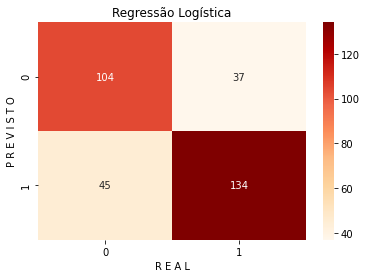

In [82]:
sns.heatmap(confusion_matrix(Y_test, pred_lr), cmap='OrRd', annot=True, fmt='2.0f')

plt.title('Regressão Logística')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

###### Matriz de Confusão K-Vizinhos

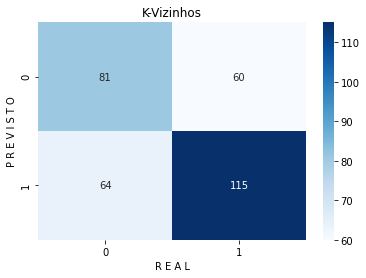

In [88]:
sns.heatmap(confusion_matrix(Y_test, knn_predict), cmap='Blues', annot=True, fmt='2.0f')

plt.title('K-Vizinhos')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

###### Matriz de Confusão Árvore de Decisão

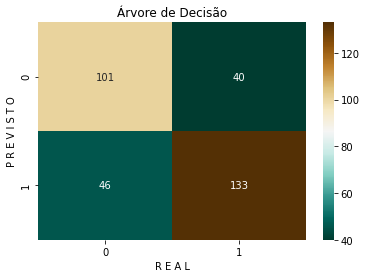

In [90]:
sns.heatmap(confusion_matrix(Y_test, pred_dt), cmap='BrBG_r', annot=True, fmt='2.0f')

plt.title('Árvore de Decisão')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

###### Matriz de Confusão Random Forest

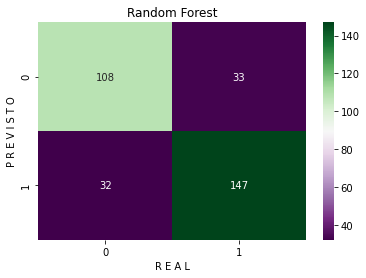

In [93]:
sns.heatmap(confusion_matrix(Y_test, pred_rf), cmap='PRGn', annot=True, fmt='2.0f')

plt.title('Random Forest')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

###### Matriz de Confusão Support Vector Machine

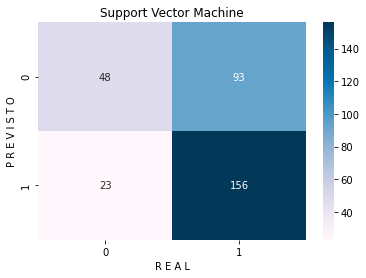

In [97]:
sns.heatmap(confusion_matrix(Y_test, pred_sv), cmap='PuBu', annot=True, fmt='2.0f')

plt.title('Support Vector Machine')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()


###### Descrição dos estudos de ML de cada modelo

Baseado na disposição dos resultados da Machine Learning, pode-se observar que a Random Forest teve a melhor acuracidade no desenvolver de classificar a maneira mais eficiente os vinhos de qualidade superior x inferior.

###### ROC e AUC

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

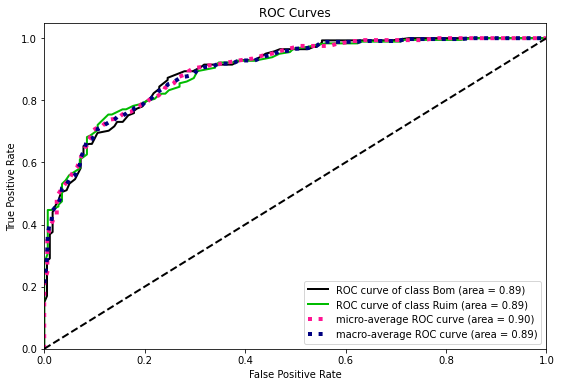

In [83]:
! pip install scikit-plot
import scikitplot as skplt

skplt.metrics.plot_roc(Y_test, rf_proba, figsize=(9,6))

###### Ganho cumulativo

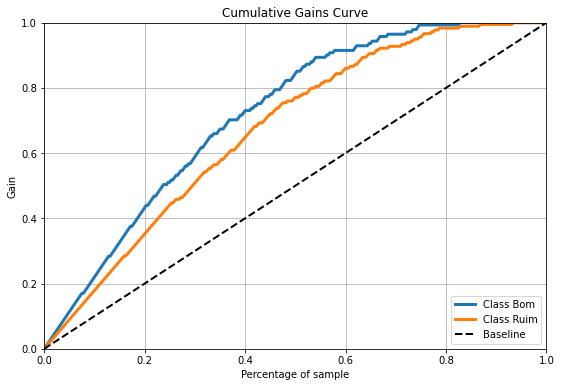

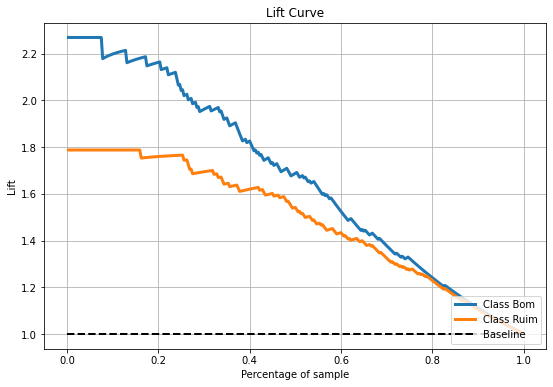

In [84]:
skplt.metrics.plot_cumulative_gain(Y_test, rf_proba, figsize=(9,6))
skplt.metrics.plot_lift_curve(Y_test,rf_proba, figsize=(9,6));

In [85]:
importance = rf.feature_importances_ 
colunas = data_red_new.columns.drop('Qualidade')
df_feat = pd.DataFrame(importance, index=colunas)
df_feat2 = df_feat.T
df_feat2

,Acidez Fixa,Acidez Volátil,Acido Citrico,Acuçar Residual,Cloretos,Dioxido de Enxofre Livre,Dióxido de Enxofre Total,Densidade,pH,Sulfatos,Alcool
0,0.067685,0.100758,0.060974,0.054965,0.073596,0.059453,0.098493,0.091215,0.066239,0.137262,0.18936
